In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns 


In [2]:
# load the dataset
data = 'exam_data.csv'
df = pd.read_csv(data)
df.head()

,A0,A1,A2,y
0,2067.582042,-15.259519,0.020472,2
1,1319.589579,-18.412320,0.521308,0
2,1170.212183,-19.470602,0.814986,0
3,1424.162191,9.867841,0.848751,1
4,1551.069098,11.809364,0.884964,1


In [4]:
X, gold_std = df.drop(columns=['y']), df['y']

In [5]:
print(f"the shape of X is {X.shape}")

the shape of X is (1000, 3)


In [19]:
gold_std.unique()

array([2, 0, 1], dtype=int64)

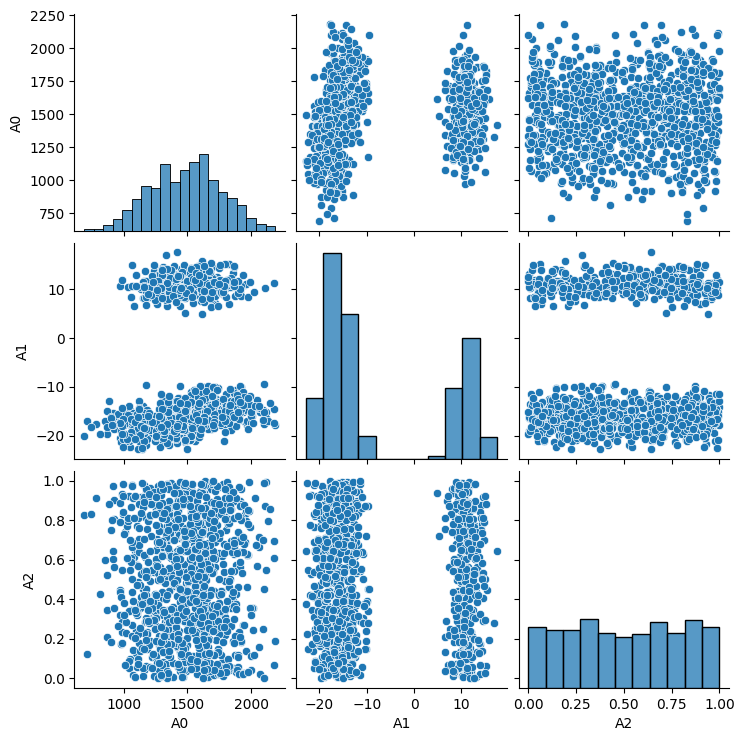

In [9]:
sns.pairplot(X)
plt.show()

In [11]:
# the distribution of the data is fine, 
from sklearn.preprocessing import PowerTransformer, MinMaxScaler 
pt = PowerTransformer()
X = pt.fit_transform(X)
X = pd.DataFrame(X, columns = ['A1', 'A2', 'A3'])

scaler = MinMaxScaler()
X = scaler.fit_transform(X)
X = pd.DataFrame(X, columns = ['A1', 'A2', 'A3'])

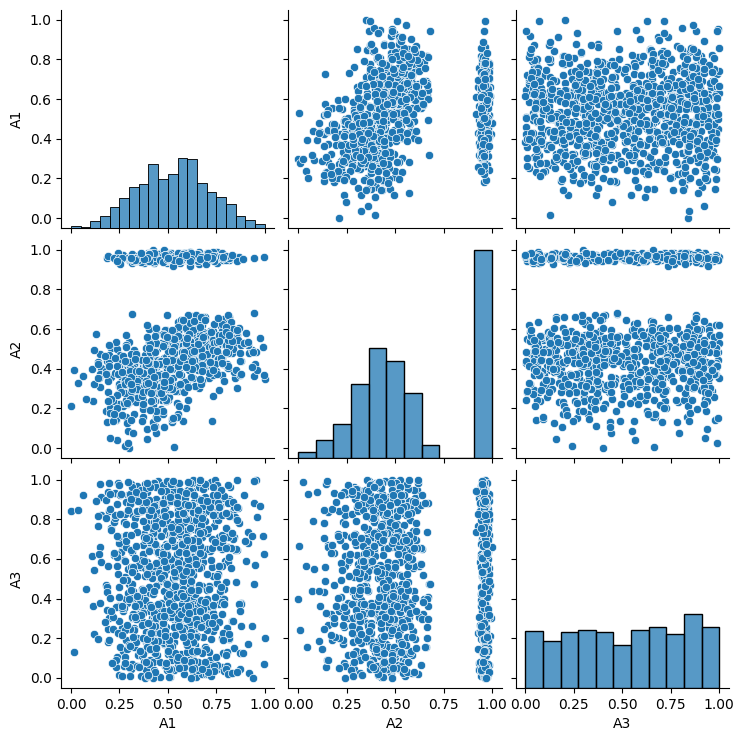

In [12]:
sns.pairplot(X)
plt.show()

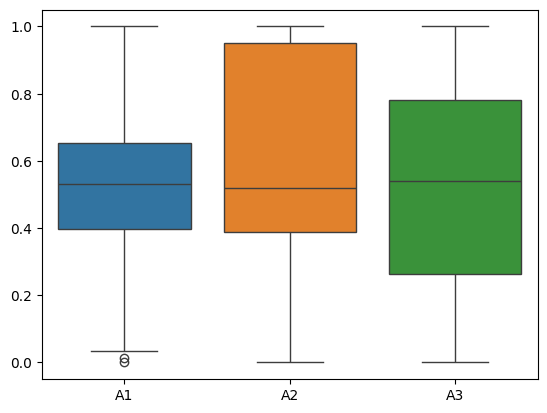

In [13]:
sns.boxplot(X)
plt.show()

In [35]:
#find a good clustering schemes 

from sklearn.cluster import KMeans
from sklearn.model_selection import ParameterGrid 
from sklearn.metrics import silhouette_score

kmin, kmax = 2, 10
results = pd.DataFrame(columns = ['n_clusters', 'silhouette', 'inertia'])

silscores = []
inertiascores = []

rs = 42

for param in range(kmin, kmax):
    
    # perform Kmeans 
    km = KMeans(n_clusters=param, random_state = rs)
    km.fit(X)
    pred = km.predict(X)
    
    # compute metrics  
    sil = silhouette_score(X, pred)
    inertia = km.inertia_
    silscores.append(sil)
    inertiascores.append(inertia)
    
    # update results 
    results.loc[len(results)] = [param, sil, inertia]
    
results

C:\Users\39392\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
C:\Users\39392\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
C:\Users\39392\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set

,n_clusters,silhouette,inertia
0,2.0,0.312672,130.861115
1,3.0,0.364997,88.580066
2,4.0,0.383186,65.633272
3,5.0,0.378243,53.013577
4,6.0,0.374447,43.259065
5,7.0,0.352024,39.191408
6,8.0,0.343395,35.191874
7,9.0,0.334057,32.213220


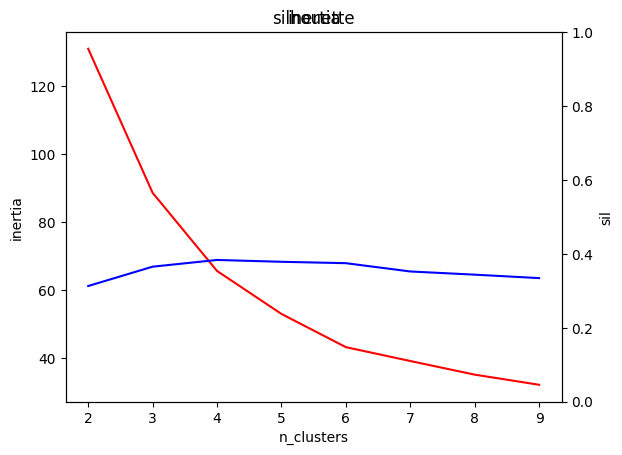

In [36]:
# plot the silhouette score 

fig, ax1 = plt.subplots()

ax1.set_title('inertia')
ax1.set_xlabel('n_clusters')
ax1.set_ylabel('inertia')
ax1.plot(range(kmin, kmax), inertiascores, color = 'r')

ax2 = ax1.twinx()

ax2.set_title('silhouette')
ax2.set_xlabel('n_clusters')
ax2.set_ylabel('sil')
ax2.plot(range(kmin, kmax), silscores, color = 'b')
ax2.set_ylim(0,1)

plt.show()

In [ ]:
# the maximum of silhouoette is reached in n_clusters = 4 
# but the elbow method suggests us to pick n_clusters = 3

In [37]:
kbest = 3
print(f"the best nuber of clusters is {kbest}")

the best nuber of clusters is 3


In [43]:
kmbest = KMeans(n_clusters=kbest, random_state = rs)
predbest = kmbest.fit_predict(X)
y_km = predbest

print(f"silhouette = {silhouette_score(X, pred)}, inertia = {kmbest.inertia_}")

silhouette = 0.33405702287255745, inertia = 88.5800662692338


C:\Users\39392\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


In [51]:
from sklearn.metrics import pair_confusion_matrix

cm = pair_confusion_matrix(gold_std, y_km)
cm = cm / (sum(cm[0]) + sum(cm[1]))
cm

array([[0.55522723, 0.11210611],
       [0.11209409, 0.22057257]])

In [52]:
print(f"the percentage of matching is {100 * (cm[0][0] + cm[1][1])}%")

the percentage of matching is 77.57997997997998%
